# Identificar fronteras no lineales

In [39]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor= .1, noise = .1)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

C:\Users\Megaport\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

#Generamos la parrilla de puntos para evaluar el modelo

    xx = np.linspace(xlim[0], xlim[1], 30)#Distribución en filas
    yy = np.linspace(xlim[0], xlim[1], 30)#Distribución en columnas
    Y, X = np.meshgrid(yy, xx)# Juntarlo en una parrilla
    xy = np.vstack([X.ravel(), Y.ravel()]).T#Hacemos el stack  la T=tupla
    P = model.decision_function(xy).reshape(X.shape)
    
#Representamos las fronteras y los márgenes del SVC

    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha= 0.5, linestyles=["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth= 1, facecolors="black")
        
        
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        
            
        

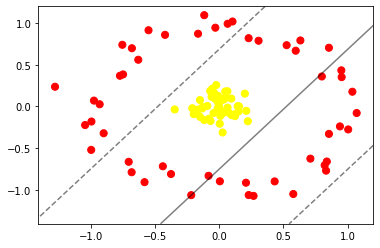

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [14]:
r = np.exp(-(X**2).sum(1))

In [15]:
r

array([0.96357235, 0.48972448, 0.35981117, 0.98342071, 0.9897051 ,
       0.98322364, 0.4427797 , 0.45045038, 0.90639709, 0.4928422 ,
       0.97337935, 0.98399915, 0.99297791, 0.4927001 , 0.29816405,
       0.36978652, 0.31595856, 0.33572068, 0.49720191, 0.9763804 ,
       0.44885967, 0.97975596, 0.38729861, 0.35599282, 0.41005533,
       0.99041679, 0.96625129, 0.98237929, 0.3075573 , 0.9219215 ,
       0.40141044, 0.97159593, 0.46413689, 0.99712868, 0.9794877 ,
       0.358733  , 0.33782414, 0.98907679, 0.99940696, 0.97398742,
       0.38466808, 0.98223602, 0.99210733, 0.40818214, 0.48579507,
       0.41477562, 0.96298786, 0.99185323, 0.48083375, 0.27647799,
       0.96061087, 0.99113975, 0.2380346 , 0.99086624, 0.39018501,
       0.98672454, 0.88559126, 0.44672838, 0.33074149, 0.99999376,
       0.96573562, 0.32809267, 0.28226877, 0.98726599, 0.99152689,
       0.95764212, 0.39159462, 0.97691757, 0.953362  , 0.96144304,
       0.45550208, 0.40106472, 0.49167937, 0.29384116, 0.95318

In [16]:
from mpl_toolkits import mplot3d

In [24]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [37]:
from ipywidgets import interact, fixed

In [27]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90],
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 6.41700967e-02,  1.81631227e-01],
       [ 3.06469374e-01,  7.87393704e-01],
       [-9.94683943e-01, -1.81051820e-01],
       [-1.29036864e-01, -8.23131153e-03],
       [ 1.39549489e-02, -1.00764683e-01],
       [-5.94467489e-02,  1.15692542e-01],
       [ 5.25037949e-01,  7.34178510e-01],
       [-3.75156201e-01, -8.10410501e-01],
       [ 2.67039296e-02, -3.12353457e-01],
       [-7.48645920e-01,  3.83530338e-01],
       [-3.83170743e-02,  1.59728512e-01],
       [-8.63745835e-03,  1.26710846e-01],
       [ 2.72176159e-02,  7.94107450e-02],
       [-4.38733668e-01, -7.17890922e-01],
       [-1.16394264e-01,  1.09387559e+00],
       [ 4.31933401e-01, -8.99034460e-01],
       [ 1.07045642e+00, -7.91661654e-02],
       [ 9.51052292e-01,  4.32406406e-01],
       [-8.28138884e-02, -8.31805831e-01],
       [ 1.54605402e-01,  4.27061920e-04],
       [ 5.95852200e-01,  6.67836160e-01],
       [ 9.72877219e-02, -1.04818206e-01],
       

In [28]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X, Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

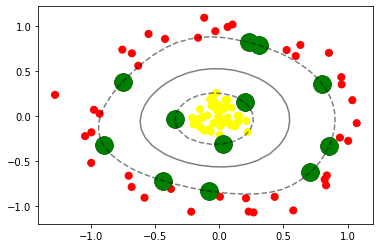

In [35]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1], s=300, lw=1, facecolors="green")

## Ajustar los parámetros de SVM

In [40]:
X, Y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)

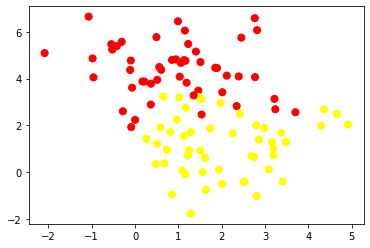

In [42]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

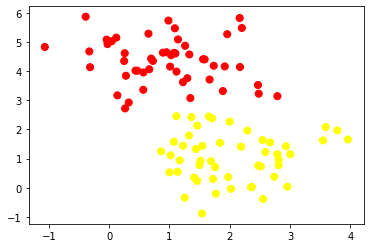

In [43]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

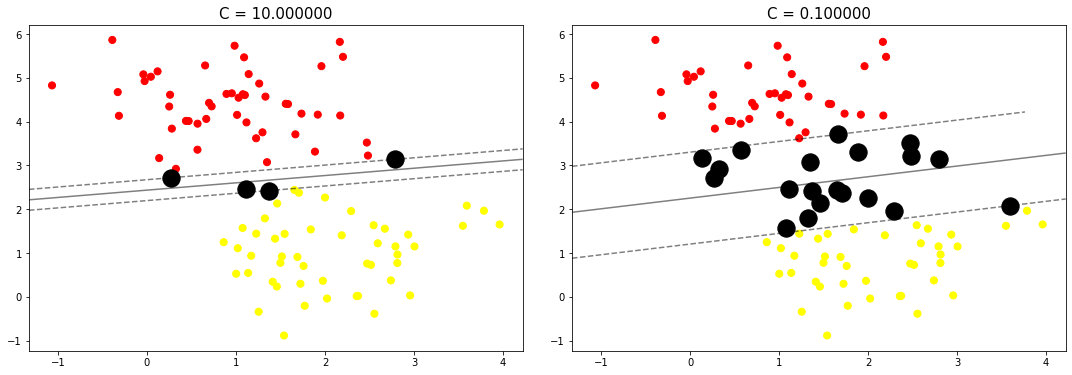

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10,0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:1f}".format(C), size=15)